<a href="https://colab.research.google.com/github/nhattien147/KiemTra_Ai/blob/main/NguyenNhatTien_19146273.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [9]:
trainset='/content/drive/MyDrive/Test_Ai/test_Ai'

In [10]:
data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.1)

In [11]:
train_dataset=data_generator.flow_from_directory(trainset,
                                     target_size=(150,150),
                                     batch_size=10,
                                     class_mode='categorical',
                                     subset="training",
                                     shuffle=True,)
validation_set=data_generator.flow_from_directory(trainset,
                                              target_size=(150,150),
                                              batch_size=10,
                                              class_mode='categorical',
                                              subset="validation",
                                              shuffle=True)

Found 82 images belonging to 4 classes.
Found 8 images belonging to 4 classes.


In [12]:
validation_set.class_indices

{'banh da lon': 0, 'banh hoi': 1, 'banh uot': 2, 'banh xeo': 3}

In [34]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [36]:
history=model.fit(train_dataset,batch_size=10,epochs=10,verbose=1,validation_data=validation_set)

Epoch 1/10
9/9 [==============================] - 11s 1s/step - loss: 14.9941 - accuracy: 0.3537 - val_loss: 1.3773 - val_accuracy: 0.1250
Epoch 2/10
9/9 [==============================] - 10s 1s/step - loss: 1.1904 - accuracy: 0.3902 - val_loss: 0.9334 - val_accuracy: 0.2500
Epoch 3/10
9/9 [==============================] - 10s 1s/step - loss: 0.8497 - accuracy: 0.6098 - val_loss: 0.6606 - val_accuracy: 0.8750
Epoch 4/10
9/9 [==============================] - 10s 1s/step - loss: 0.5169 - accuracy: 0.8171 - val_loss: 0.3717 - val_accuracy: 0.8750
Epoch 5/10
9/9 [==============================] - 10s 1s/step - loss: 0.5950 - accuracy: 0.7439 - val_loss: 0.3409 - val_accuracy: 0.8750
Epoch 6/10
9/9 [==============================] - 12s 1s/step - loss: 0.3716 - accuracy: 0.8659 - val_loss: 0.2694 - val_accuracy: 0.8750
Epoch 7/10
9/9 [==============================] - 10s 1s/step - loss: 0.1240 - accuracy: 0.9756 - val_loss: 0.1690 - val_accuracy: 0.8750
Epoch 8/10
9/9 [=================

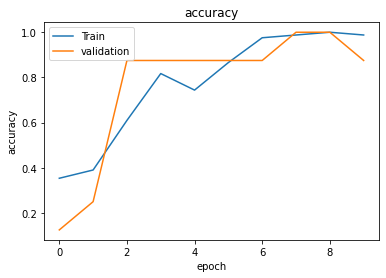

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','validation'],loc='upper left')
plt.show()


In [24]:
classes=['banh da lon','banh hoi','banh uot','banh xeo']

banh xeo


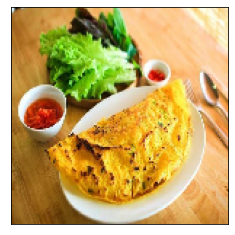

In [25]:
url='/content/banh-xeo.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh hoi


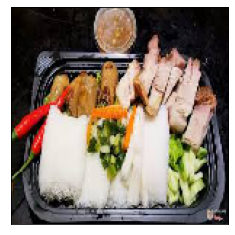

In [26]:
url='/content/banh_hoi.jfif'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh da lon


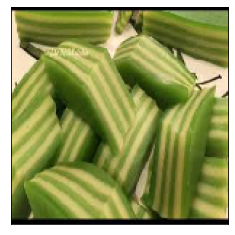

In [29]:
url='/content/banh_da_lon.jfif'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh uot


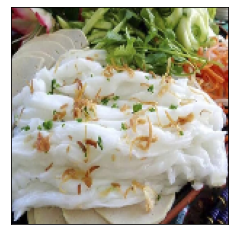

In [30]:
url='/content/banh_uot.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh hoi


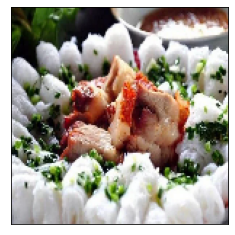

In [32]:
url='/content/banhhoi_3.webp'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh xeo


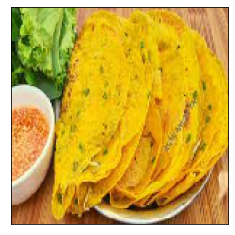

In [33]:
url='/content/banhxeo_2.jfif'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

banh uot


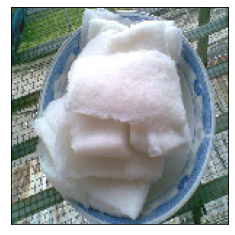

In [38]:
url='/content/banh_hoi_5.jpg'
img=load_img(url,target_size=(150,150))
plt.imshow(img)
plt.xticks([])
plt.yticks([])
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img/255.0
print(classes[np.argmax(model.predict(img))])

In [39]:
model.save('/content/drive/MyDrive/Test_Ai/model_save/model.h5')